In [1]:
!pip install -q tflite-model-maker

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
from PIL import Image

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [32]:
myPathHelper = os.getcwd() + '/backup/imagesNoXMLCopy/'                             
folderList = os.listdir(myPathHelper)

In [33]:
import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir = myPathHelper
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  AngelaMerkel
processing class directory  AnnalenaBaerbock
processing class directory  AnthonyFauci
processing class directory  BarackObama
processing class directory  ChrisPratt
processing class directory  ChristianLindner
processing class directory  CristianoRonaldo
processing class directory  DonaldTrump
processing class directory  DwayneJohnson
processing class directory  EdSheeran
processing class directory  ElonMusk
processing class directory  ElyasM'barek
processing class directory  GüntherJauch
processing class directory  HeidiKlum
processing class directory  HeleneFischer
processing class directory  JeffBezos
processing class directory  JoeBiden
processing class directory  JudithRakers
processing class directory  KarlLauterbach
processing class directory  LewisHamilton
processing class directory  LionelMessi
processing class directory  MacKenzieScott
processing class directory  ManuelNeuer
processing class directory  MaxVerstappen
processing class di

In [34]:
for folder in folderList:
    print(folder)
    myPath = myPathHelper + '/' + folder
    myFiles = [f for f in os.listdir(myPath) if f.endswith('.jpg')]
    #print(myPath)
    for i, file in enumerate(myFiles):
        #print(file)
        im1 = Image.open(f'{myPath}/{file}')
        fileNoEnding, ext = os.path.splitext(f'{file}')
        im1.save(f'{myPath}/{fileNoEnding}.jpeg')
        os.remove(f'{myPath}/{file}')

AngelaMerkel
AnnalenaBaerbock
AnthonyFauci
BarackObama
ChrisPratt
ChristianLindner
CristianoRonaldo
DonaldTrump
DwayneJohnson
EdSheeran
ElonMusk
ElyasM'barek
GüntherJauch
HeidiKlum
HeleneFischer
JeffBezos
JoeBiden
JudithRakers
KarlLauterbach
LewisHamilton
LionelMessi
MacKenzieScott
ManuelNeuer
MaxVerstappen
Nena
OlafScholz
Rihanna
SebastianVettel
StefanRaab
TomCruise
WladimirPutin
XiJinping


In [38]:
data = DataLoader.from_folder(myPathHelper)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 6400, num_label: 32, labels: AngelaMerkel, AnnalenaBaerbock, AnthonyFauci, BarackObama, ChrisPratt, ChristianLindner, CristianoRonaldo, DonaldTrump, DwayneJohnson, EdSheeran, ElonMusk, ElyasM'barek, GüntherJauch, HeidiKlum, HeleneFischer, JeffBezos, JoeBiden, JudithRakers, KarlLauterbach, LewisHamilton, LionelMessi, MacKenzieScott, ManuelNeuer, MaxVerstappen, Nena, OlafScholz, Rihanna, SebastianVettel, StefanRaab, TomCruise, WladimirPutin, XiJinping.


INFO:tensorflow:Load image with size: 6400, num_label: 32, labels: AngelaMerkel, AnnalenaBaerbock, AnthonyFauci, BarackObama, ChrisPratt, ChristianLindner, CristianoRonaldo, DonaldTrump, DwayneJohnson, EdSheeran, ElonMusk, ElyasM'barek, GüntherJauch, HeidiKlum, HeleneFischer, JeffBezos, JoeBiden, JudithRakers, KarlLauterbach, LewisHamilton, LionelMessi, MacKenzieScott, ManuelNeuer, MaxVerstappen, Nena, OlafScholz, Rihanna, SebastianVettel, StefanRaab, TomCruise, WladimirPutin, XiJinping.


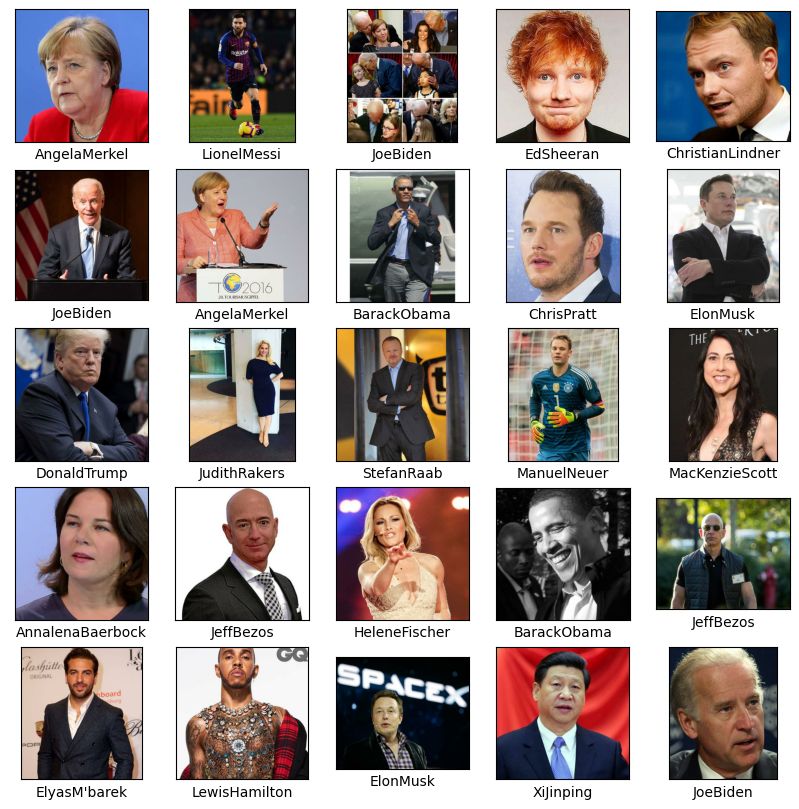

In [39]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [40]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_6 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                40992     
                                                                 
Total params: 3,454,016
Trainable params: 40,992
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
160/160 [==============================] - 9s 48ms/step - loss: 2.7945 - accuracy: 0.2662 - val_loss: 2.2316 - val_accuracy: 0.4906
Epoch 2/5
160/160 [==============================] - 7s 46ms/step - loss: 2.0906 - accurac

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_6 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                40992     
                                                                 
Total params: 3,454,016
Trainable params: 40,992
Non-trainable params: 3,413,024
_________________________________________________________________


In [42]:
loss, accuracy = model.evaluate(test_data)

20/20 [==============================] - 2s 35ms/step - loss: 1.6932 - accuracy: 0.6797


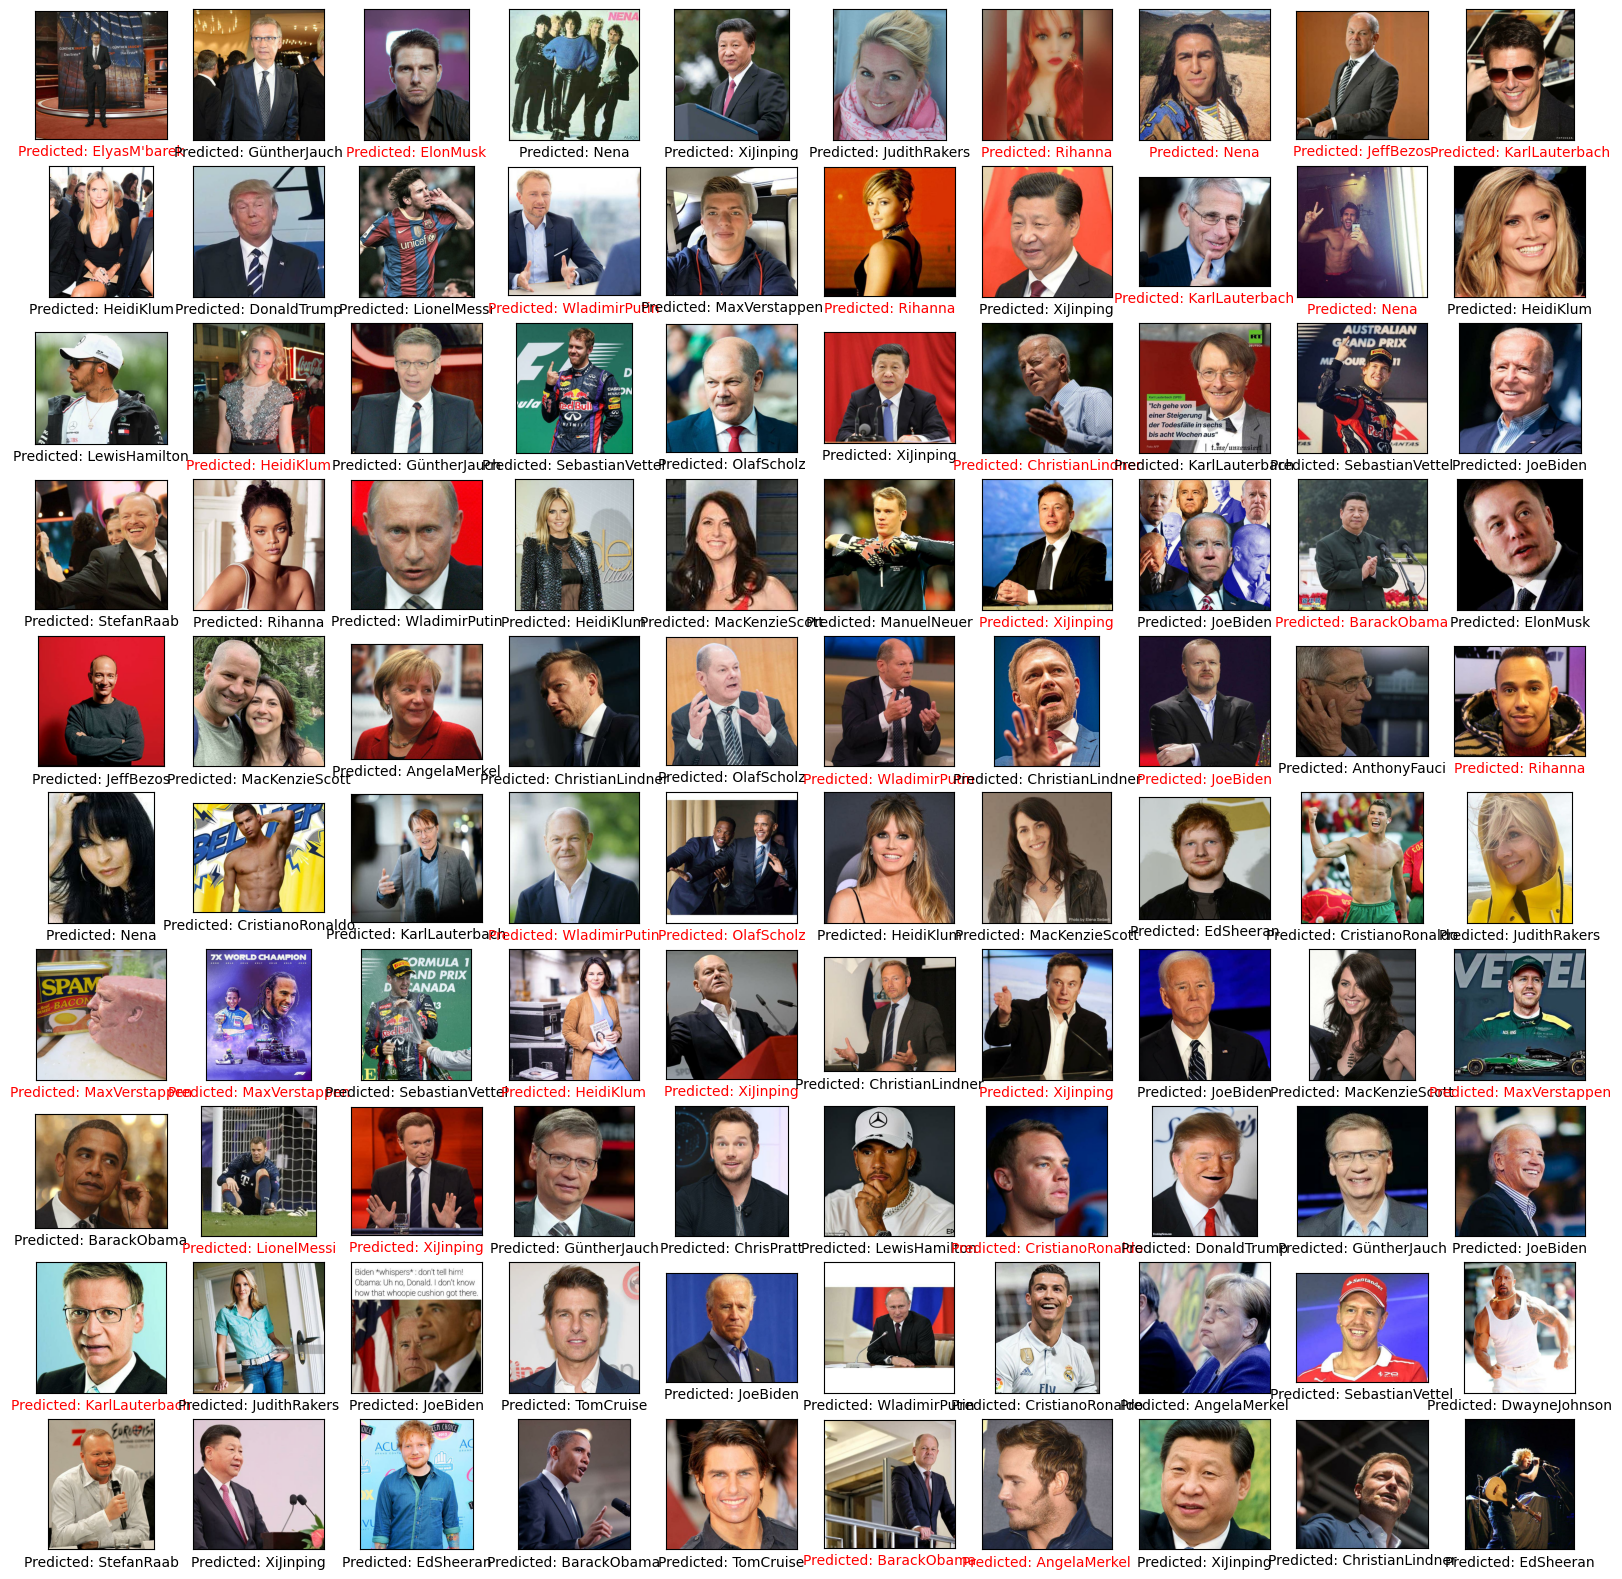

In [43]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [45]:
model.export(export_dir=f'{os.getcwd()}/models/classification')

INFO:tensorflow:Assets written to: /tmp/tmphliqhl93/assets


INFO:tensorflow:Assets written to: /tmp/tmphliqhl93/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp2i9zd58n/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp2i9zd58n/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /tf/src/images/models/classification/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /tf/src/images/models/classification/model.tflite


In [46]:
model.evaluate_tflite('/tf/src/images/models/classification/model.tflite', test_data)

{'accuracy': 0.6796875}